In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
params = {
    "Nx": 50,
    "Ny": 100,
    "D_x": 0.1,
    "V_c": 10.0,
    "R_c": 1.0,
    "epsilon": 1e-6,
}

In [3]:
def calculate_S(V, Dx):
    V_i_j = V[:-1, :-1]

    V_ip1_j = V[:-1, 1:]
    V_i_jp1 = V[1:, :-1]

    term_x = ((V_ip1_j - V_i_j) / Dx)**2
    term_y = ((V_i_jp1 - V_i_j) / Dx)**2

    S = (Dx**2 / 2.0) * np.sum(term_x + term_y)
    return S

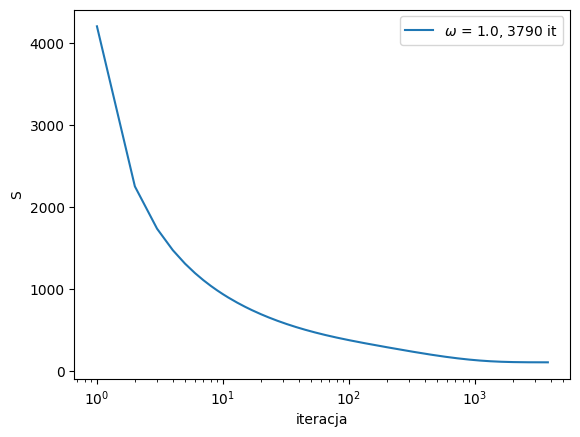

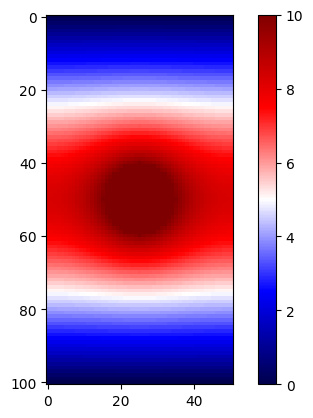

In [23]:
def relax_global(params: dict):
    Nx = params["Nx"]
    Ny = params["Ny"]
    D_x = params["D_x"]
    V_c = params["V_c"]
    R_c = params["R_c"]
    R_c_squared = R_c**2
    epsilon = params["epsilon"]

    R_x = Nx / 2
    R_y = Ny / 2

    V_start = np.zeros((Ny+1, Nx+1), dtype=float)

    x_s, y_s = np.meshgrid(np.arange(Nx+1) - R_x, np.arange(Ny+1) - R_y)
    dists = (D_x*x_s)**2 + (D_x*y_s)**2
    circle_idxs = dists <= R_c_squared

    def reset_to_dirichlet(V):
        V[circle_idxs] = V_c

        V[0, :] = 0.0
        V[-1, :] = 0.0

    reset_to_dirichlet(V_start)

    # Neumann's
    V_start[1:-1, 0] = 0.0
    V_start[1:-1, -1] = 0.0

    V_old = V_start
    prev_S = calculate_S(V_start, D_x)

    all_Ss = [prev_S]

    MAX_ITER = 10_000
    for i in range(MAX_ITER):
        V_new = V_old.copy()

        V_new[1:-1, 1:-1] = 0.25 * (
            V_old[2:, 1:-1] +
            V_old[0:-2, 1:-1] +
            V_old[1:-1, 2:] +
            V_old[1:-1, :-2]
        )

        reset_to_dirichlet(V_new)

        # Neumann's
        V_new[1:-1, 0] = V_new[1:-1, 1]
        V_new[1:-1, -1] = V_new[1:-1, -2]

        S = calculate_S(V_new, D_x)
        all_Ss.append(S)

        V_old = V_new

        if abs(S - prev_S) < epsilon * abs(prev_S):
            break

        prev_S = S

    return V_old, all_Ss


V, Ss = relax_global(params)

plt.plot(np.arange(1, len(Ss)+1), Ss, label=f"$\omega$ = 1.0, {len(Ss)} it")
plt.xscale("log")
plt.ylabel("S")
plt.xlabel("iteracja")
plt.legend()
plt.show()

plt.imshow(V, cmap='seismic')
plt.colorbar()
plt.show()

In [22]:
Ss[0]

4200.000000000001